# P9.2
 Determine numerically (looking for the eigenvector) values of
ergodic density for the random walk on selected network. [1P]

Node   | Numerical q  | Analytical q | Diff        
------------------------------------------------------
0      | 0.09090909   | 0.09090909   | 0.00000000
1      | 0.06277056   | 0.06277056   | 0.00000000
2      | 0.07142857   | 0.07142857   | 0.00000000
3      | 0.03896104   | 0.03896104   | 0.00000000
4      | 0.01731602   | 0.01731602   | 0.00000000
5      | 0.03030303   | 0.03030303   | 0.00000000
6      | 0.02813853   | 0.02813853   | 0.00000000
7      | 0.02813853   | 0.02813853   | 0.00000000
8      | 0.03679654   | 0.03679654   | 0.00000000
9      | 0.00649351   | 0.00649351   | 0.00000000
10     | 0.01731602   | 0.01731602   | 0.00000000
11     | 0.00649351   | 0.00649351   | 0.00000000
12     | 0.00865801   | 0.00865801   | 0.00000000
13     | 0.03679654   | 0.03679654   | 0.00000000
14     | 0.01082251   | 0.01082251   | 0.00000000
15     | 0.01515152   | 0.01515152   | 0.00000000
16     | 0.01298701   | 0.01298701   | 0.00000000
17     | 0.00649351   | 0.00649351   | 0.00

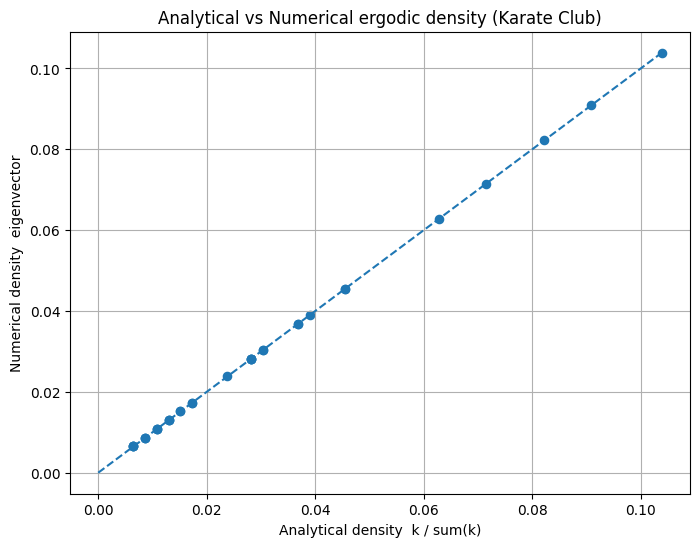

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
A = nx.to_numpy_array(G, dtype=float)

n = A.shape[0]
k = A.sum(axis=1)
m = G.number_of_edges()

P = np.zeros((n, n), dtype=float)
for i in range(n):
    if k[i] > 0:
        P[:, i] = A[i, :] / k[i]
    else:
        P[i, i] = 1.0

vals, vecs = np.linalg.eig(P)
idx = np.argmin(np.abs(vals - 1))
q = np.real(vecs[:, idx])

q = np.abs(q)
q = q / q.sum()

q_ana = k / k.sum()

print(f"{'Node':<6} | {'Numerical q':<12} | {'Analytical q':<12} | {'Diff':<12}")
print("-" * 54)
for i in range(n):
    diff = abs(q[i] - q_ana[i])
    print(f"{i:<6} | {q[i]:.8f}   | {q_ana[i]:.8f}   | {diff:.8f}")

print("\nChecks:")
print("sum(q_num) =", q.sum())
print("sum(q_ana) =", q_ana.sum())
print("2|E| =", 2*m, "  sum(k) =", k.sum())

plt.figure(figsize=(8, 6))
plt.scatter(q_ana, q, s=35)
mx = max(q_ana.max(), q.max())
plt.plot([0, mx], [0, mx], linestyle='--')
plt.xlabel('Analytical density  k / sum(k)')
plt.ylabel('Numerical density  eigenvector')
plt.title('Analytical vs Numerical ergodic density (Karate Club)')
plt.grid(True)
plt.show()


# P9.3
Determine dynamically (by iterating the Markov operator)
ergodic density for the random walk on selected network. [1P]


Converged in iterations: 195
Final L1 error: 9.788949165145944e-13

Node   | Dynamic q    | Eigen q      | Analytical q | Diff dyn-eig
------------------------------------------------------------------------------
0      | 0.09090909   | 0.09090909   | 0.09090909   | 0.00000000
1      | 0.06277056   | 0.06277056   | 0.06277056   | 0.00000000
2      | 0.07142857   | 0.07142857   | 0.07142857   | 0.00000000
3      | 0.03896104   | 0.03896104   | 0.03896104   | 0.00000000
4      | 0.01731602   | 0.01731602   | 0.01731602   | 0.00000000
5      | 0.03030303   | 0.03030303   | 0.03030303   | 0.00000000
6      | 0.02813853   | 0.02813853   | 0.02813853   | 0.00000000
7      | 0.02813853   | 0.02813853   | 0.02813853   | 0.00000000
8      | 0.03679654   | 0.03679654   | 0.03679654   | 0.00000000
9      | 0.00649351   | 0.00649351   | 0.00649351   | 0.00000000
10     | 0.01731602   | 0.01731602   | 0.01731602   | 0.00000000
11     | 0.00649351   | 0.00649351   | 0.00649351   | 0.00000000
12    

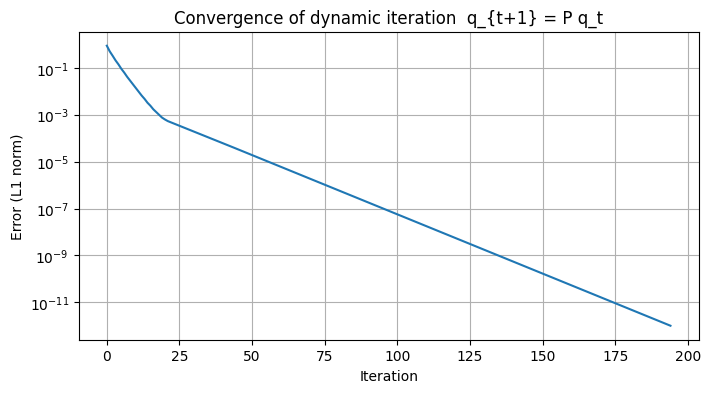

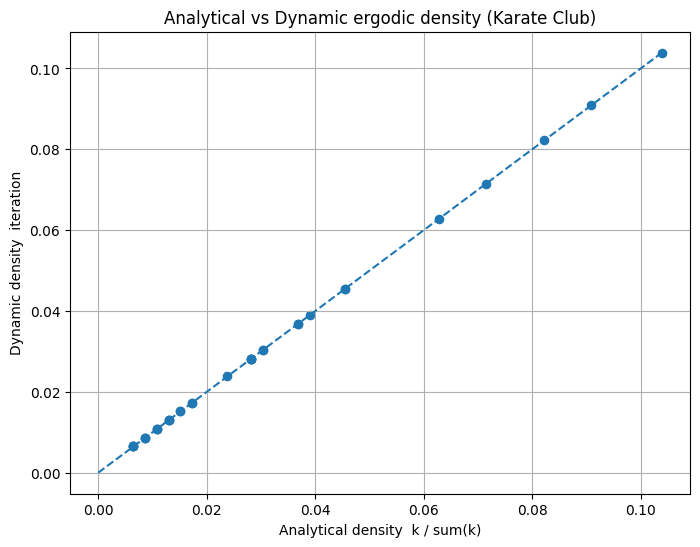

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

A = nx.to_numpy_array(G, dtype=float)
n = A.shape[0]
k = A.sum(axis=1)

P = np.zeros((n, n), dtype=float)
for i in range(n):
    if k[i] > 0:
        P[:, i] = A[i, :] / k[i]
    else:
        P[i, i] = 1.0

q = np.ones(n) / n
eps = 1e-12
max_iter = 100000

history = []

for t in range(max_iter):
    q_next = P @ q
    err = np.linalg.norm(q_next - q, 1)
    history.append(err)
    if err < eps:
        q = q_next
        break
    q = q_next

q = q / q.sum()

vals, vecs = np.linalg.eig(P)
idx = np.argmin(np.abs(vals - 1))
q_eig = np.real(vecs[:, idx])
q_eig = np.abs(q_eig)
q_eig = q_eig / q_eig.sum()

q_ana = k / k.sum()

print("Converged in iterations:", t + 1)
print("Final L1 error:", history[-1])
print()

print(f"{'Node':<6} | {'Dynamic q':<12} | {'Eigen q':<12} | {'Analytical q':<12} | {'Diff dyn-eig':<12}")
print("-" * 78)
for i in range(n):
    diff = abs(q[i] - q_eig[i])
    print(f"{i:<6} | {q[i]:.8f}   | {q_eig[i]:.8f}   | {q_ana[i]:.8f}   | {diff:.8f}")

print("\nChecks:")
print("sum(q_dyn) =", q.sum())
print("sum(q_eig) =", q_eig.sum())
print("sum(q_ana) =", q_ana.sum())

plt.figure(figsize=(8, 4))
plt.plot(history)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error (L1 norm)')
plt.title('Convergence of dynamic iteration  q_{t+1} = P q_t')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(q_ana, q, s=35)
mx = max(q_ana.max(), q.max())
plt.plot([0, mx], [0, mx], linestyle='--')
plt.xlabel('Analytical density  k / sum(k)')
plt.ylabel('Dynamic density  iteration')
plt.title('Analytical vs Dynamic ergodic density (Karate Club)')
plt.grid(True)
plt.show()


#  P9.5
 Determine the value of classic or modified pagerank for the
selected network. [1.5P]


In [5]:
import numpy as np
import networkx as nx

G = nx.karate_club_graph()
A = nx.to_numpy_array(G, dtype=float)

n = A.shape[0]
k = A.sum(axis=1)

P = np.zeros((n, n), dtype=float)
for i in range(n):
    if k[i] > 0:
        P[:, i] = A[i, :] / k[i]
    else:
        P[:, i] = 1.0 / n

alpha = 0.85
eps = 1e-12
max_iter = 100000

def pagerank_iter(P, alpha, v, eps, max_iter):
    q = np.ones(n) / n
    for t in range(max_iter):
        q_next = alpha * (P @ q) + (1 - alpha) * v
        if np.linalg.norm(q_next - q, 1) < eps:
            q = q_next
            break
        q = q_next
    q = q / q.sum()
    return q, t + 1

v = np.ones(n) / n
pr_manual, it1 = pagerank_iter(P, alpha, v, eps, max_iter)
pr_nx = nx.pagerank(G, alpha=alpha)

print("Classic PageRank: manual vs NetworkX\n")
print(f"{'Node':<6} | {'Manual':<12} | {'NetworkX':<12} | {'Diff':<12}")
print("-" * 54)
for i in range(n):
    diff = abs(pr_manual[i] - pr_nx[i])
    print(f"{i:<6} | {pr_manual[i]:.8f}   | {pr_nx[i]:.8f}   | {diff:.8e}")
print("\nConverged in iterations:", it1)

v_p = np.zeros(n)
v_p[0] = 1.0

ppr_manual, it2 = pagerank_iter(P, alpha, v_p, eps, max_iter)

personalization = {i: float(v_p[i]) for i in range(n)}
ppr_nx = nx.pagerank(G, alpha=alpha, personalization=personalization)

print("\nPersonalized PageRank toward node 0: manual vs NetworkX\n")
print(f"{'Node':<6} | {'Manual':<12} | {'NetworkX':<12} | {'Diff':<12}")
print("-" * 54)
for i in range(n):
    diff = abs(ppr_manual[i] - ppr_nx[i])
    print(f"{i:<6} | {ppr_manual[i]:.8f}   | {ppr_nx[i]:.8f}   | {diff:.8e}")
print("\nConverged in iterations:", it2)


Classic PageRank: manual vs NetworkX

Node   | Manual       | NetworkX     | Diff        
------------------------------------------------------
0      | 0.08850032   | 0.08850807   | 7.75853452e-06
1      | 0.05741232   | 0.05741484   | 2.52113412e-06
2      | 0.06276562   | 0.06276686   | 1.24069789e-06
3      | 0.03721003   | 0.03721208   | 2.04671827e-06
4      | 0.02050080   | 0.02050398   | 3.17626681e-06
5      | 0.03380387   | 0.03381044   | 6.56950176e-06
6      | 0.03152302   | 0.03152901   | 5.99237878e-06
7      | 0.02646320   | 0.02646462   | 1.41599273e-06
8      | 0.03338248   | 0.03338156   | 9.27797052e-07
9      | 0.00946349   | 0.00946322   | 2.75385029e-07
10     | 0.02068568   | 0.02068902   | 3.33138850e-06
11     | 0.00978500   | 0.00978569   | 6.88405300e-07
12     | 0.01147426   | 0.01147487   | 6.08188596e-07
13     | 0.03347292   | 0.03347419   | 1.26211980e-06
14     | 0.01294240   | 0.01294160   | 8.02959723e-07
15     | 0.01637744   | 0.01637633   | 1.1111


- Build the graph $G$ and its adjacency matrix $A$.
- Compute node degrees: $k_i = \sum_j A_{ij}$.
- Build the random-walk transition matrix $P$ (column-stochastic):
  - $p_{ji} = \dfrac{A_{ij}}{k_i}$ if $k_i > 0$,
  - if $k_i = 0$ (dangling node), set $P[:,i] = \dfrac{1}{n}$.
- PageRank iteration (random walk with teleportation):
  $$
  q_{t+1} = \alpha P q_t + (1-\alpha) v
  $$
- Parameters:
  - $\alpha$ – damping factor (probability of following edges),
  - $v$ – teleportation / personalization distribution.
- Convergence test uses the $L^1$ norm:
  $$
  \lVert q_{t+1} - q_t \rVert_1 < \varepsilon
  $$
- Normalize the result so that $\sum_i q_i = 1$.
- Two standard choices of $v$:
  - **Classic PageRank:** $v = \dfrac{1}{n}\mathbf{1}$,
  - **Personalized PageRank:** $v = e_0$.
- The limit vector $q$ is the PageRank score.
- Results are validated by comparison with `networkx.pagerank`.


# P9.6
 Find a graph with a fixed number of edges and vertices where
diffusion occurs fastest (hint: value a second eigenvalue can
help). [3.5P]



Scenario S1: n=20, m=40
Best lambda2(lazy): 0.7667219038162294


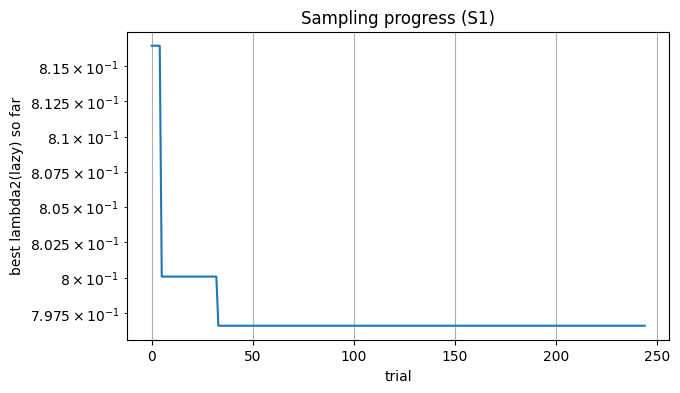

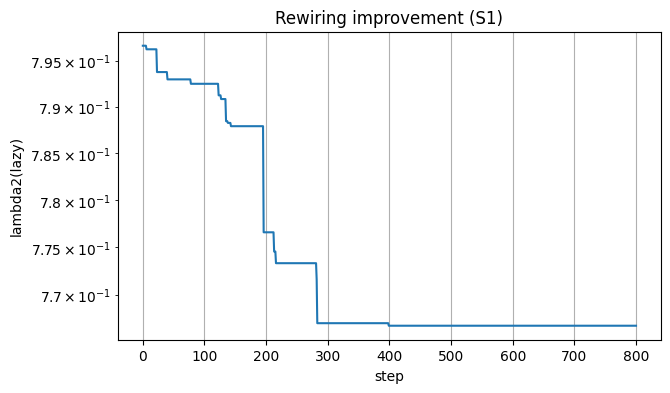

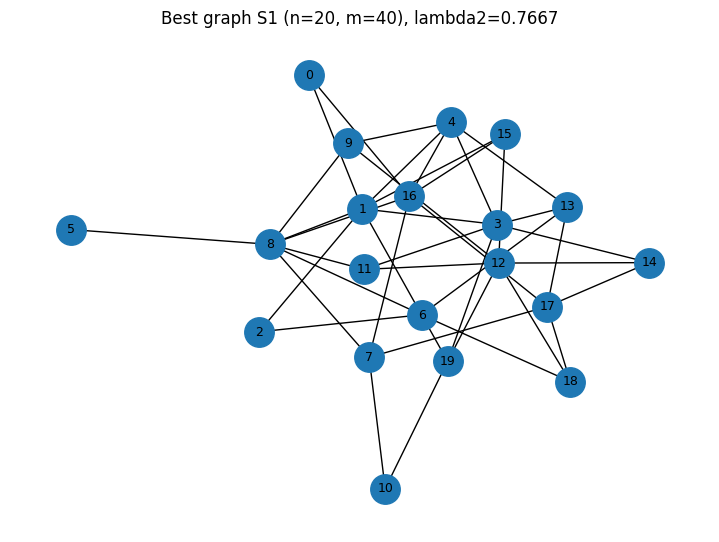


Scenario S2: n=30, m=60
Best lambda2(lazy): 0.8077917526023043


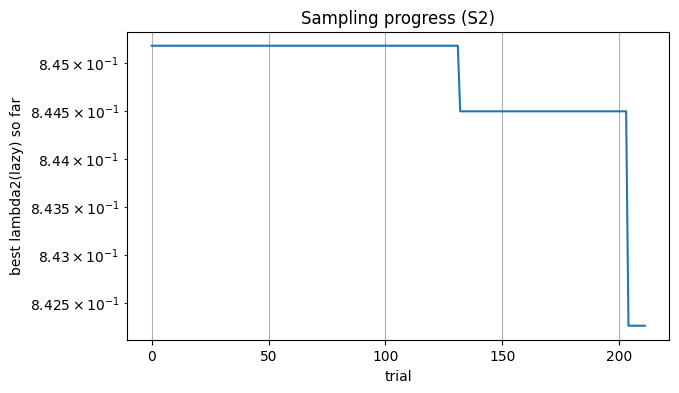

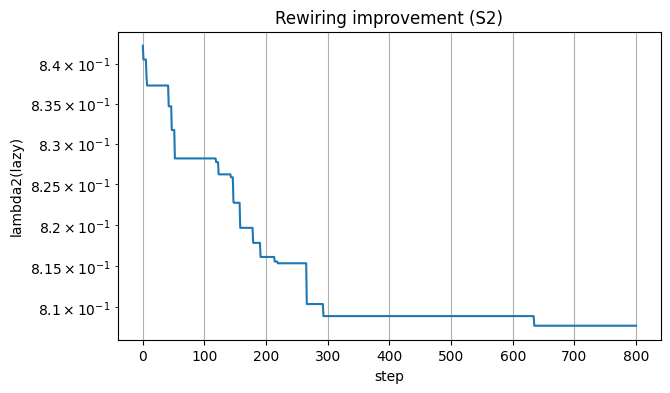

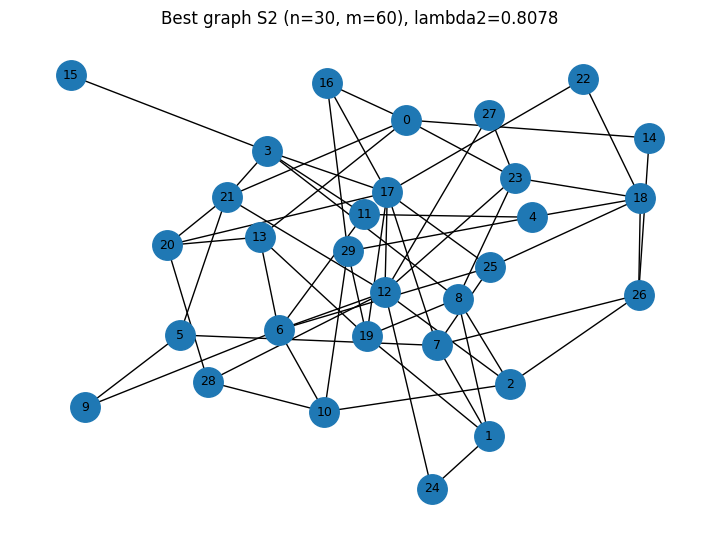


Scenario S3: n=40, m=80
Best lambda2(lazy): 0.8219840495765862


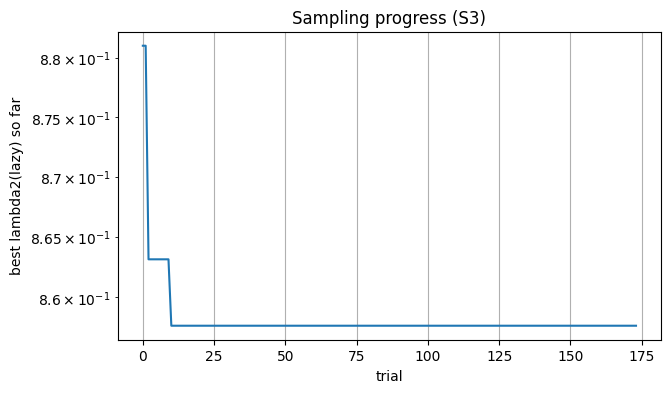

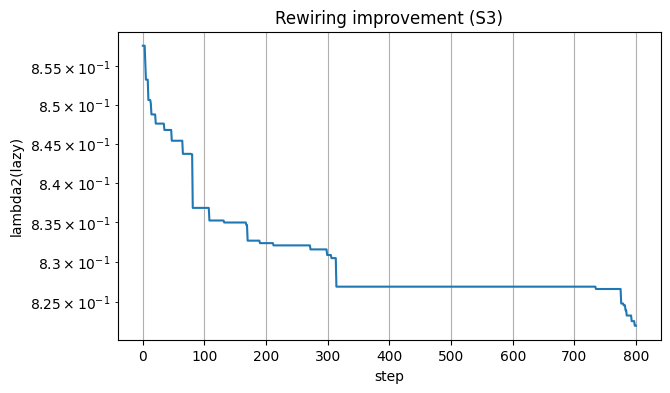

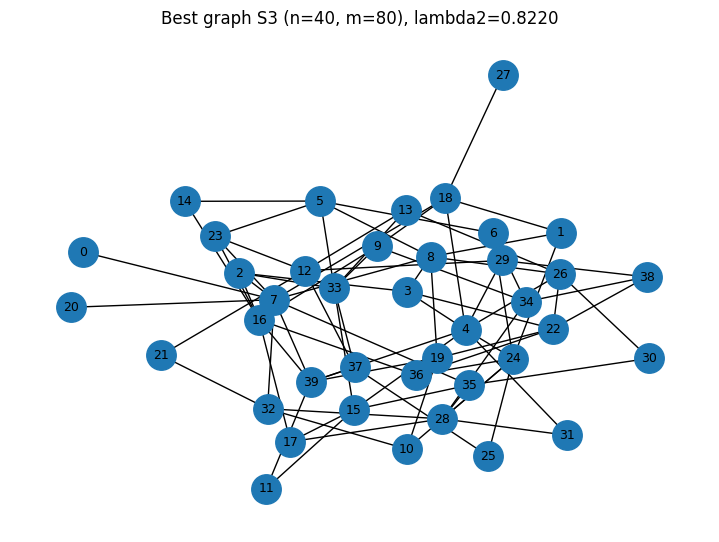


Summary:
Scenario | n    | m    | best lambda2(lazy)
--------------------------------------------
S1       | 20   | 40   | 0.766722          
S2       | 30   | 60   | 0.807792          
S3       | 40   | 80   | 0.821984          


In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def lambda2_lazy(G):
    A = nx.to_numpy_array(G, dtype=float)
    n = A.shape[0]
    k = A.sum(axis=1)

    P = np.zeros((n, n), dtype=float)
    for i in range(n):
        if k[i] > 0:
            P[:, i] = A[i, :] / k[i]
        else:
            P[i, i] = 1.0

    P_lazy = 0.5 * (np.eye(n) + P)
    vals = np.linalg.eigvals(P_lazy)
    vals = np.sort(np.real(vals))[::-1]
    return vals[1]

def try_rewire(G):
    G2 = G.copy()
    edges = list(G2.edges())
    if len(edges) < 2:
        return G2

    (a, b) = edges[np.random.randint(len(edges))]
    (c, d) = edges[np.random.randint(len(edges))]
    if len({a, b, c, d}) < 4:
        return G2

    if G2.has_edge(a, c) or G2.has_edge(b, d):
        return G2

    G2.remove_edge(a, b)
    G2.remove_edge(c, d)
    G2.add_edge(a, c)
    G2.add_edge(b, d)

    if nx.is_connected(G2):
        return G2

    G2.remove_edge(a, c)
    G2.remove_edge(b, d)
    G2.add_edge(a, b)
    G2.add_edge(c, d)
    return G2

def find_fast_graph(n, m, trials=200, rewire_steps=600):
    best_l2 = 1e9
    best_G = None
    best_history = []

    for _ in range(trials):
        G = nx.gnm_random_graph(n, m)
        if not nx.is_connected(G):
            continue
        l2 = lambda2_lazy(G)
        if l2 < best_l2:
            best_l2 = l2
            best_G = G.copy()
        best_history.append(best_l2)

    if best_G is None:
        return None, None, best_history, []

    l2_curr = lambda2_lazy(best_G)
    improve_history = [l2_curr]
    G_curr = best_G.copy()

    for _ in range(rewire_steps):
        G_new = try_rewire(G_curr)
        if G_new.number_of_edges() != m:
            improve_history.append(l2_curr)
            continue
        l2_new = lambda2_lazy(G_new)
        if l2_new < l2_curr:
            G_curr = G_new
            l2_curr = l2_new
        improve_history.append(l2_curr)

    return G_curr, l2_curr, best_history, improve_history

scenarios = [
    {"name": "S1", "n": 20, "m": 40},
    {"name": "S2", "n": 30, "m": 60},
    {"name": "S3", "n": 40, "m": 80},
]

results = []

for sc in scenarios:
    n = sc["n"]
    m = sc["m"]
    G_best, l2_best, h1, h2 = find_fast_graph(n, m, trials=300, rewire_steps=800)

    print(f"\nScenario {sc['name']}: n={n}, m={m}")
    if G_best is None:
        print("No connected graph found in trials.")
        continue

    print("Best lambda2(lazy):", l2_best)
    results.append((sc["name"], n, m, l2_best, G_best, h1, h2))

    plt.figure(figsize=(7, 4))
    if len(h1) > 0:
        plt.plot(h1)
        plt.yscale('log')
        plt.xlabel('trial')
        plt.ylabel('best lambda2(lazy) so far')
        plt.title(f"Sampling progress ({sc['name']})")
        plt.grid(True)
        plt.show()

    plt.figure(figsize=(7, 4))
    if len(h2) > 0:
        plt.plot(h2)
        plt.yscale('log')
        plt.xlabel('step')
        plt.ylabel('lambda2(lazy)')
        plt.title(f"Rewiring improvement ({sc['name']})")
        plt.grid(True)
        plt.show()

    plt.figure(figsize=(7, 5))
    pos = nx.spring_layout(G_best, seed=42)
    nx.draw(G_best, pos, with_labels=True, node_size=450, font_size=9)
    plt.title(f"Best graph {sc['name']} (n={n}, m={m}), lambda2={l2_best:.4f}")
    plt.show()

print("\nSummary:")
print(f"{'Scenario':<8} | {'n':<4} | {'m':<4} | {'best lambda2(lazy)':<18}")
print("-" * 44)
for name, n, m, l2, *_ in results:
    print(f"{name:<8} | {n:<4} | {m:<4} | {l2:<18.6f}")


- Mixing speed is measured by **λ₂ (second largest eigenvalue)** of the
  **lazy random walk** transition matrix.
- Build the random-walk transition matrix `P` from the graph.
- Construct the lazy walk:
  $$P_{\text{lazy}} = \tfrac{1}{2}(I + P)$$
- Compute eigenvalues of `P_lazy` and take the second largest one (λ₂).
- **Sampling phase**:
  - Generate many random graphs with fixed `(n, m)`.
  - Keep only connected graphs.
  - Select the graph with the smallest λ₂ found so far.
- **Rewiring phase**:
  - Randomly rewire two edges while preserving the number of edges.
  - Keep the change only if the graph stays connected
    and λ₂ becomes smaller.
  - Repeat to locally improve the graph.
